In [1]:
import pandas as pd

df = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 4")

#dropping unnecessary information
df = df.drop(range(0,15))

#named each colums, will split them later (especially year and gender which is now combinded together)
df.columns=['Sort', 'Country/Area','Notes','Country Code','Data Type','1990f', '1995f', '2000f','2005f','2010f','2015f']

#droped three columns, will fix later if needed
df = df.drop('Notes', axis=1)
df = df.drop('Data Type', axis=1)
df = df.drop('Sort', axis=1)

#showing rows of current data frame
df.head(100)

,Country/Area,Country Code,1990f,1995f,2000f,2005f,2010f,2015f
15,WORLD,900,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
16,Developed regions,901,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,Developing regions,902,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,Least developed countries,941,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,Less developed regions excluding least develop...,934,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398
...,...,...,...,...,...,...,...,...
110,Timor-Leste,626,50.301541,51.11362,51.94303,50.540493,41.354821,41.083626
111,Viet Nam,704,45.835408,45.01385,42.162667,39.912687,41.753028,42.071353
112,Southern Asia,5501,45.457533,45.367349,44.923426,45.067527,44.483332,45.408724
113,Afghanistan,4,43.559963,45.324516,43.559414,43.557847,43.558672,49.408288


In [2]:
#splitting my dataframe #1 for regions

regionsDf = df[(df['Country Code'] == 901)|(df['Country Code'] == 902)|(df['Country Code'] == 941)|(df['Country Code'] == 934)] 

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
regionsDf = regionsDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Female migrants as a percentage of the international migrant stock")
regionsDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)
#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
regionsDf=(regionsDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

regionsDf= regionsDf.drop('Gender', axis=1)

regionsDf.head(100)

,Regions,Country Code,Female migrants as a percentage of the international migrant stock,Year
0,Developed regions,901,51.123977,1990
1,Developing regions,902,46.592099,1990
2,Least developed countries,941,47.261155,1990
3,Less developed regions excluding least develop...,934,46.466684,1990
4,Developed regions,901,51.149024,1995
5,Developing regions,902,46.500135,1995
6,Least developed countries,941,47.571664,1995
7,Less developed regions excluding least develop...,934,46.279022,1995
8,Developed regions,901,51.113307,2000
9,Developing regions,902,46.128444,2000


In [3]:
#splitting my dataframe #2 for Countries

#identifying the data I want to include for this table according to their country code
CountryDf = df[(df['Country Code'] <900)]

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
CountryDf = CountryDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="Female migrants as a percentage of the international migrant stock")

#renaming the column to Countries
CountryDf.rename(columns={'Country/Area': 'Countries'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
CountryDf=(CountryDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

CountryDf.head(100)

,Countries,Country Code,Female migrants as a percentage of the international migrant stock,Gender,Year
0,Burundi,108,50.987061,f,1990
1,Comoros,174,52.290646,f,1990
2,Djibouti,262,47.437838,f,1990
3,Eritrea,232,47.434166,f,1990
4,Ethiopia,231,47.439047,f,1990
...,...,...,...,...,...
95,Iraq,368,33.3425,f,1990
96,Israel,376,52.791382,f,1990
97,Jordan,400,48.839926,f,1990
98,Kuwait,414,39.046585,f,1990


In [4]:
#splitting my dataframe #3 for Area of Destination

#Identifying the parameters I want to include in this data, sorting them according to country codes
AreaDf = df[((df['Country Code'] > 903) & (df['Country Code']< 954))|(df['Country Code']== 5501)|(df['Country Code']== 5500)]

#Because some of the areas includes regions between 903 to 954, I want to exclude the regions in here so I am using a function including the "not equal to "
AreaDf = AreaDf[(AreaDf['Country Code'] != 941)&(AreaDf['Country Code'] !=901)&(AreaDf['Country Code'] !=902)&(AreaDf['Country Code'] !=934)]

#renaming the column using pandas documentation
AreaDf.rename(columns={'Country/Area': 'Area of Destination'}, inplace=True)

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
AreaDf = AreaDf.melt(id_vars=["Area of Destination","Country Code"], var_name=["Years"],value_name="Female migrants as a percentage of the international migrant stock")

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
AreaDf=(AreaDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

AreaDf.head(100)

,Area of Destination,Country Code,Female migrants as a percentage of the international migrant stock,Gender,Year
0,Sub-Saharan Africa,947,47.276121,f,1990
1,Eastern Africa,910,48.504812,f,1990
2,Middle Africa,911,49.025765,f,1990
3,Northern Africa,912,48.791486,f,1990
4,Southern Africa,913,39.606165,f,1990
...,...,...,...,...,...
95,South America,931,50.828224,f,2005
96,Northern America,905,50.30193,f,2005
97,Oceania,909,50.378747,f,2005
98,Australia and New Zealand,927,50.561579,f,2005


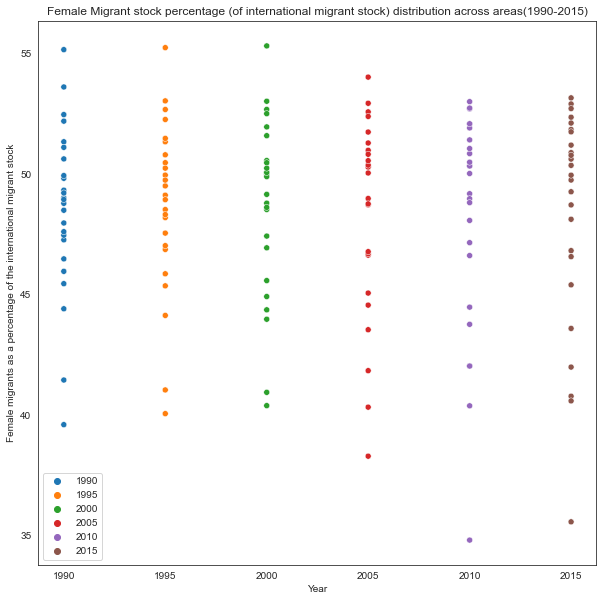

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
#we will be showing the Female Migrant stock percentage of the international migrant stock distribution across areas(1990-2015)


f, ax = plt.subplots(1, 1, figsize=(10,10))
#f.suptitle(fontweight='bold',fontsize=16)
ax.set_title('Line plot showing the total population growth of regions (1990-2015)',fontweight="bold")
ax.set_ylabel('')


sns.scatterplot(data=AreaDf, x="Year", y="Female migrants as a percentage of the international migrant stock", hue="Year",ax=ax)

plt.title("Female Migrant stock percentage (of international migrant stock) distribution across areas(1990-2015)")
plt.legend()
plt.show()